In [15]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from  torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split

%matplotlib inline

In [16]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)

class AnnModel(nn.Module):
    
    def __init__(self,in_f=4,out_f=3,h1=12,h2=12):
        
        super().__init__()
        self.fc1 = nn.Linear(in_f,h1)
        
        self.fc2 = nn.Linear(h1,h2)
        
        self.out = nn.Linear(h2,out_f)
        
    def forward(self,features):
        
        features = F.relu(self.fc1(features))
        features = F.relu(self.fc2(features))
        features = self.out(features)
        return features

model = AnnModel()

In [17]:

df = pd.read_csv('PYTORCH_NOTEBOOKS/Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [18]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

### Preparing for Data Loader

In [19]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)

testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [20]:
criterion = nn.CrossEntropyLoss()

optimizer= torch.optim.Adam(lr=0.001,params = model.parameters())

### Training

In [21]:
epochs = 1000
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%100 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.08542585
epoch: 101  loss: 0.62412381
epoch: 201  loss: 0.36907771
epoch: 301  loss: 0.20554860
epoch: 401  loss: 0.11690804
epoch: 501  loss: 0.08656569
epoch: 601  loss: 0.07387456
epoch: 701  loss: 0.06697559
epoch: 801  loss: 0.06250384
epoch: 901  loss: 0.05833523


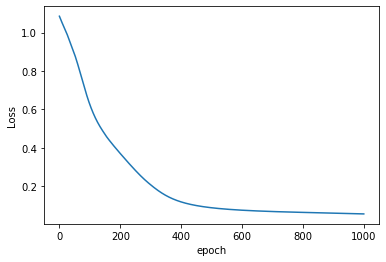

In [22]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');